In [2]:
%matplotlib inline
%load_ext zipline

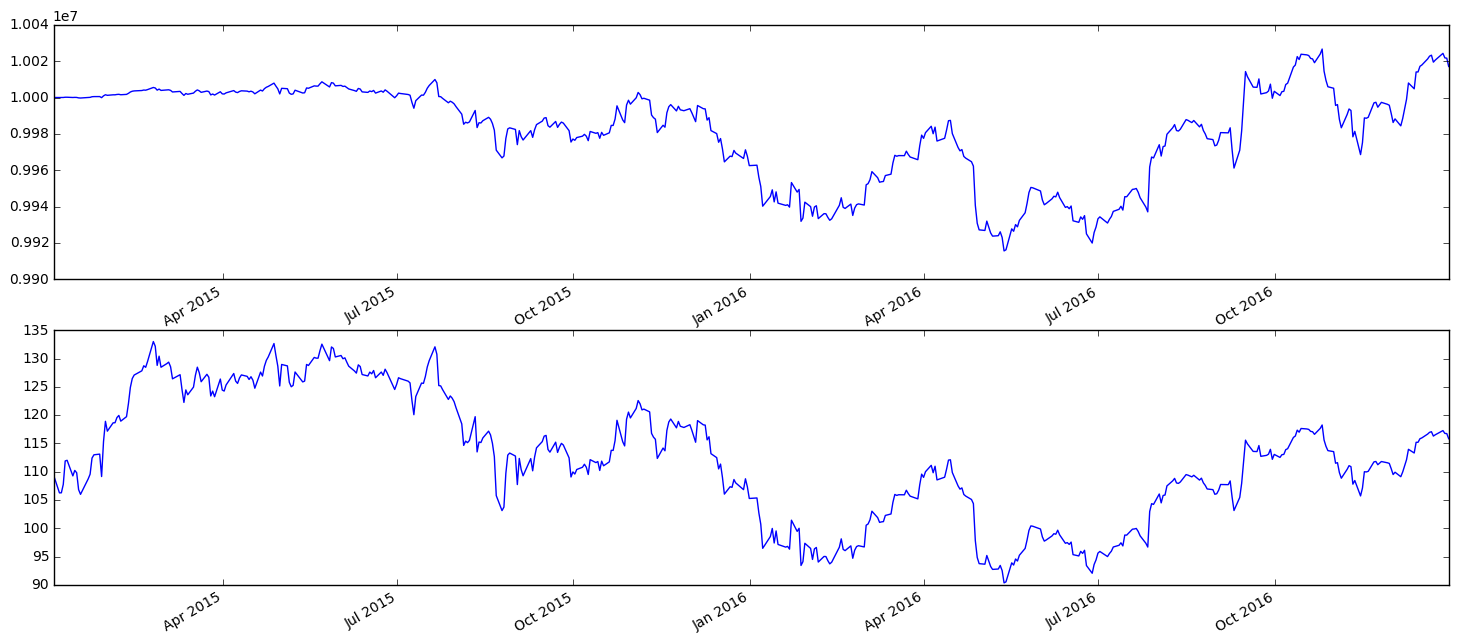

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-02 21:00:00,109.33,NaN,0.000000e+00,NaN,-0.000535,NaN,NaN,0.0,10000000.00,0.0,...,0,0,0,NaN,10000000.00,0.0,0.0,1,[],0.0212
2015-01-05 21:00:00,106.25,1.122497e-06,-1.000000e-07,7.695753e-07,-0.018585,0.196712,0.000006,-1063.5,9998936.50,1062.5,...,0,0,0,-11.224972,10000000.00,0.0,0.0,2,"[{'price': 106.25000000000026, 'sid': Equity(0...",0.0204
2015-01-06 21:00:00,106.26,8.742998e-07,-1.900000e-07,-2.483339e-06,-0.027829,0.139101,0.000006,-1063.6,9997872.90,2125.2,...,0,0,0,-12.943566,9998936.50,1062.5,1062.5,3,"[{'price': 106.26000000000025, 'sid': Equity(0...",0.0197
2015-01-07 21:00:00,107.75,2.337289e-05,2.690000e-06,2.636176e-04,-0.015715,0.206972,0.000096,-1078.5,9996794.40,3232.5,...,0,0,0,158.702342,9997872.90,2125.2,2125.2,4,"[{'price': 107.75000000000067, 'sid': Equity(0...",0.0196
2015-01-08 21:00:00,111.89,8.513024e-05,1.501000e-05,7.251936e-04,0.001751,0.236040,0.000283,-1119.9,9995674.50,4475.6,...,0,0,0,792.055675,9996794.40,3232.5,3232.5,5,"[{'price': 111.89000000000031, 'sid': Equity(0...",0.0203
2015-01-09 21:00:00,112.01,7.801584e-05,1.539000e-05,7.160675e-04,-0.006276,0.218111,0.000285,-1121.1,9994553.40,5600.5,...,0,0,0,741.349292,9995674.50,4475.6,4475.6,6,"[{'price': 112.0100000000004, 'sid': Equity(0 ...",0.0198
2015-01-12 21:00:00,109.25,1.217837e-04,1.490000e-06,2.363895e-04,-0.014061,0.203321,0.000372,-1093.5,9993459.90,6555.0,...,0,0,0,0.643221,9994553.40,5600.5,5600.5,7,"[{'price': 109.25000000000044, 'sid': Equity(0...",0.0192
2015-01-13 21:00:00,110.22,1.169096e-04,7.210000e-06,4.176433e-04,-0.016834,0.188301,0.000367,-1103.2,9992356.70,7715.4,...,0,0,0,2.911201,9993459.90,6555.0,6555.0,8,"[{'price': 110.22000000000024, 'sid': Equity(0...",0.0191
2015-01-14 21:00:00,109.80,1.113297e-04,4.170000e-06,3.537389e-04,-0.022769,0.177393,0.000376,-1099.0,9991257.70,8784.0,...,0,0,0,1.550820,9992356.70,7715.4,7715.4,9,"[{'price': 109.80000000000045, 'sid': Equity(0...",0.0186
2015-01-15 21:00:00,106.82,1.613203e-04,-1.977000e-05,-9.728644e-05,-0.031721,0.170557,0.000502,-1069.2,9990188.50,9613.8,...,0,0,0,-3.563581,9991257.70,8784.0,8784.0,10,"[{'price': 106.8200000000003, 'sid': Equity(0 ...",0.0177


In [13]:
%%zipline --start=2015-1-1 --end=2017-1-1

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    plt.gcf().set_size_inches(18, 8)
    plt.show()

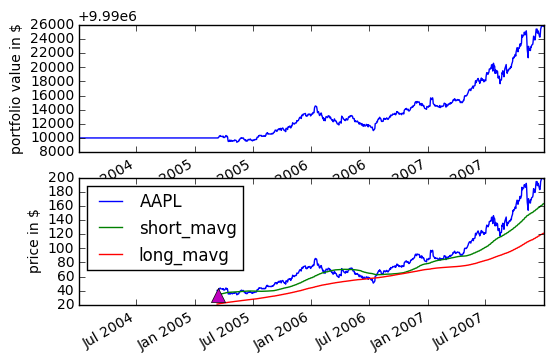

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2004-01-02 21:00:00,NaN,NaN,0.000000,NaN,-0.000449,NaN,NaN,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,1,[],0.0438
2004-01-05 21:00:00,NaN,0.000000,0.000000,0.000000,0.010424,0.127153,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,2,[],0.0441
2004-01-06 21:00:00,NaN,0.000000,0.000000,0.000000,0.011413,0.097935,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,3,[],0.0429
2004-01-07 21:00:00,NaN,0.000000,0.000000,0.000000,0.014827,0.080035,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,4,[],0.0427
2004-01-08 21:00:00,NaN,0.000000,0.000000,0.000000,0.018871,0.069343,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,5,[],0.0427
2004-01-09 21:00:00,NaN,0.000000,0.000000,0.000000,0.009975,0.101951,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,6,[],0.0411
2004-01-12 21:00:00,NaN,0.000000,0.000000,0.000000,0.017344,0.098995,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,7,[],0.0411
2004-01-13 21:00:00,NaN,0.000000,0.000000,0.000000,0.011503,0.102602,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,8,[],0.0405
2004-01-14 21:00:00,NaN,0.000000,0.000000,0.000000,0.020219,0.103200,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,9,[],0.0401
2004-01-15 21:00:00,NaN,0.000000,0.000000,0.000000,0.022466,0.097298,0.000000,0,10000000,0.0,...,NaN,0,0,NaN,10000000,0.0,0.0,10,[],0.0399


In [30]:
%%zipline --start 2004-1-1 --end 2008-1-1


from zipline.api import order_target, record, symbol, history
import matplotlib.pyplot as plt
import numpy as np

def initialize(context):
    context.aapl = symbol('AAPL')
    context.i = 0


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.aapl, 'price', 100, '1d').mean()
#     print(short_mavg)
    long_mavg = data.history(context.aapl, 'price', 300, '1d').mean()
#     print(long_mavg)

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(symbol('AAPL'), 100)
    elif short_mavg < long_mavg:
        order_target(symbol('AAPL'), 0)

    # Save values for later inspection
    record(AAPL=data[symbol('AAPL')].price,
           short_mavg=short_mavg,
           long_mavg=long_mavg)


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()